Vamos a trabajar con datos de verdad. Podéis encontrar una serie de conjuntos de datos que vamos a meter en dataframes:

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Una forma cómoda de cargar los datos puede ser subirlos en formato .csv a un *gist* de *GitHub* y utilizar la función *read_csv* de pandas pasándole la url del *gist*.<br></br>
No va a hacer falta que lo hagáis en estos ejercicios, pero está bien saberlo para el futuro. Os explicaremos bien cómo se hace cuando os toque usarlo.

In [23]:
gasolina_url = "https://gist.githubusercontent.com/w-dan/4a788daed122583e3cabd7b81a2b3aea/raw/9129ed5974093d73623fb653899f385325c0e18e/gas.csv"
felicidad_url = "https://gist.githubusercontent.com/w-dan/43e1bb780e5a6623764f78925aa31337/raw/ecc871ef48fc16a8364ce06d7e72a7a4ce07f790/happiness.csv"

In [24]:
df_gasolina = pd.read_csv(gasolina_url)
df_felicidad = pd.read_csv(felicidad_url)

Visualizamos el dataframe de los precios mensuales de gasolina, por ejemplo:

In [25]:
df_gasolina

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Current Year Cumulative Production
0,2023,16,2393748000,2417856000,3.964972e+10
1,2023,15,2367876000,2324364000,3.725597e+10
2,2023,14,2222052000,2402568000,3.488810e+10
3,2023,13,2209116000,2858856000,3.266605e+10
4,2023,12,2742138000,2641884000,3.045693e+10
...,...,...,...,...,...
168,2020,5,2688630000,2675106000,1.391590e+10
169,2020,4,2876496000,2723028000,1.122727e+10
170,2020,3,2819460000,2741256000,8.350776e+09
171,2020,2,2750076000,2699508000,5.531316e+09


Poco legible, ¿verdad? Vamos a intentar hacerlo un poco más visible.

## Ejercicio 1

Representa gráficamente las columnas "Current Year Production" y "Current Year Cumulative Production". ¿Qué distribución dirías que siguen por su aspecto? ¿Borrarías datos? En caso afirmativo, ¿cuáles?
*Esto aplica para todos los ejercicios, pero puedes insertar tantas celdas de código como necesites.*

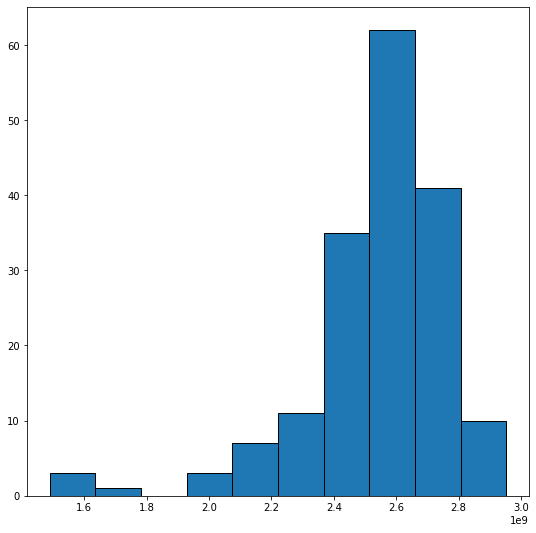

In [26]:
fix, ax = plt.subplots(figsize = (9, 9))
ax.hist(df_gasolina["Current Year Production"], edgecolor="black");

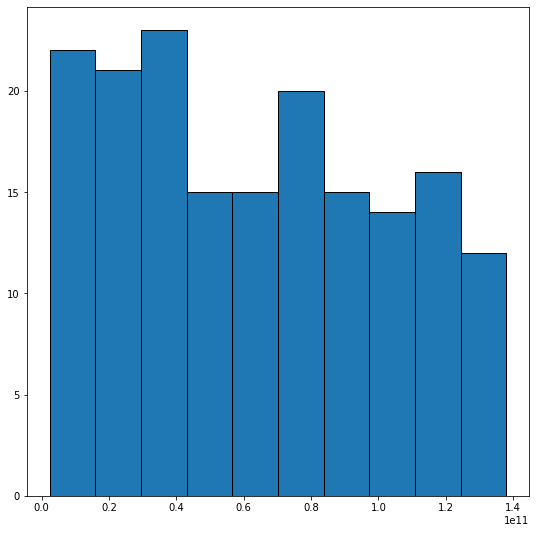

In [27]:
fix, ax = plt.subplots(figsize = (9, 9))
ax.hist(df_gasolina["Current Year Cumulative Production"], edgecolor="black");

Respuesta a: ¿Borrarías datos? En caso afirmativo, ¿cuáles?

## Ejercicio 2

Crea una nueva columna "Diferencia" en el dataframe que contenga la diferencia entre la cantidad producida en el año actual (Current Year Production) y el año anterior (Previous Year Production).

In [28]:
df_gasolina['Diferencia'] = df_gasolina['Current Year Production'] - df_gasolina['Previous Year Production']
df_gasolina

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Current Year Cumulative Production,Diferencia
0,2023,16,2393748000,2417856000,3.964972e+10,-24108000
1,2023,15,2367876000,2324364000,3.725597e+10,43512000
2,2023,14,2222052000,2402568000,3.488810e+10,-180516000
3,2023,13,2209116000,2858856000,3.266605e+10,-649740000
4,2023,12,2742138000,2641884000,3.045693e+10,100254000
...,...,...,...,...,...,...
168,2020,5,2688630000,2675106000,1.391590e+10,13524000
169,2020,4,2876496000,2723028000,1.122727e+10,153468000
170,2020,3,2819460000,2741256000,8.350776e+09,78204000
171,2020,2,2750076000,2699508000,5.531316e+09,50568000


## Ejercicio 3

## 3.1
Acota los valores de la columna "Current Year Cumulative Production" entre 0 y 1.

In [34]:
scaler = MinMaxScaler()
df_gasolina[['Current Year Cumulative Production']] = scaler.fit_transform(df_gasolina[['Current Year Cumulative Production']])
df_gasolina

,Fiscal Year,Fiscal Week,Current Year Production,Previous Year Production,Current Year Cumulative Production,Diferencia
0,2023,16,2393748000,2417856000,0.274526,-24108000
1,2023,15,2367876000,2324364000,0.256868,43512000
2,2023,14,2222052000,2402568000,0.239402,-180516000
3,2023,13,2209116000,2858856000,0.223011,-649740000
4,2023,12,2742138000,2641884000,0.206716,100254000
...,...,...,...,...,...,...
168,2020,5,2688630000,2675106000,0.084702,13524000
169,2020,4,2876496000,2723028000,0.064869,153468000
170,2020,3,2819460000,2741256000,0.043651,78204000
171,2020,2,2750076000,2699508000,0.022853,50568000


### 3.2
¿Qué columnas eliminarías por no aportar nada de información?

Los IDs no aportan información y por tanto, se deben borrar.